## Lead Scoring Case Study

### Step 1: Importing and Cleaning Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

sns.set(style="darkgrid")

In [3]:
# Importing all datasets
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<b>Many columns in the dataset contain "Select" values, which likely represent default options when the customer did not make any specific selections from the available lists. Treating these "Select" values as NULL will allow us to handle them appropriately during data preprocessing and model building.</b>

In [7]:
# Replace 'Select' values with null values
leads.replace('Select', np.nan, inplace=True)

In [8]:
# Check for missing values
print(leads.isnull().sum().sort_values(ascending=False))

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [9]:
# The number of columns which have more than 30% null values
sum((leads.isnull().mean() * 100) > 30)

10

So we can see from the above code that there are 17/37 columns which have null values and 10 columns have more than 30% null values

In [10]:
## Remove columns which have too many missing values
# Calculate number of rows which is 30% of the length of the dataframe
threshold = int(0.3 * len(leads))
print("Threshold: ",threshold)

# Find columns with more than threshold of missing values
missing_vals = leads.isnull().sum()
cols_to_drop = list(missing_vals[missing_vals > threshold].index)
print (cols_to_drop)
# Drop columns
leads = leads.drop(columns=cols_to_drop)

Threshold:  2772
['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [11]:
# Check the df again
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [12]:
# Check for missing values
print(leads.isnull().sum().sort_values(ascending=False))

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
X Education Forums                                  0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                                         0
Newspaper Article                                   0
Magazine                    

In [13]:
# Check values of column "What matters most to you in choosing a course", "What is your current occupation" and "Country"
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [14]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [15]:
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [16]:
# Drop "What matters most to you in choosing a course" as it's a high skewed column
leads=leads.drop('What matters most to you in choosing a course',axis=1)

# Impute missing values in "What is your current occupation" column with the mode
leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()[0], inplace=True)

# Impute missing values in "Country" column with the mode
leads['Country'].fillna(leads['Country'].mode()[0], inplace=True)

In [17]:
# Other columns have a few missing values so we can drop those rows:
# Dropping the rows with null values
leads.dropna(inplace = True)

In [18]:
# Find duplicated rows
duplicate_rows = leads.duplicated()

# Count the number of duplicated rows
duplicate_rows.sum()

0

We don't have duplicated rows in the dataset

In [19]:
# Check the final df
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [20]:
leads.shape

(9074, 26)

### Step 2: EDA

In [21]:
# Curent conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

The current lead conversion rate is 38%.

#### Univariate Analysis - Categorical Variables

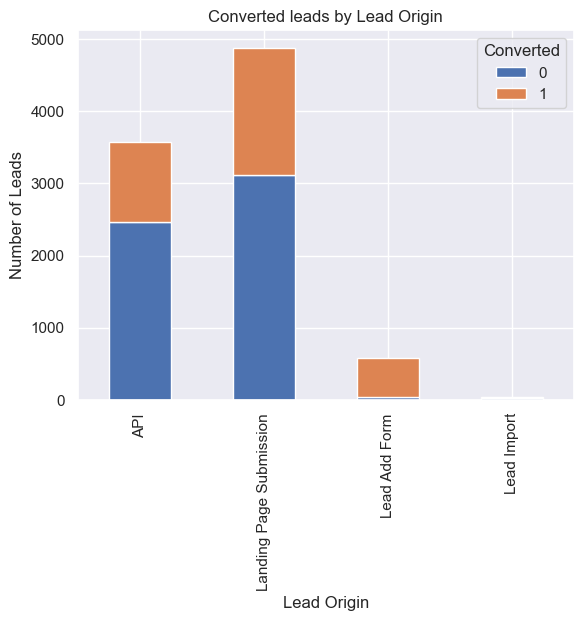

In [22]:
# Lead Origin
contingency_table = pd.crosstab(index=leads['Lead Origin'], columns=leads['Converted'])
contingency_table.plot(kind='bar', stacked=True)
plt.title('Converted leads by Lead Origin')
plt.xlabel('Lead Origin')
plt.ylabel('Number of Leads')
plt.show()

API and Landing Page Submission generate a considerable number of leads, with a conversion rate of 30-35%.
Lead Add Form has a high conversion rate of over 90%, but the total number of leads is relatively low.
Lead Import has the lowest count of leads among all sources.

In [23]:
# Check "Lead Source" column
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [24]:
# Replace "google with Google"
leads['Lead Source'].replace('google', 'Google', inplace=True)

# Create a new category 'Others' for Lead Sources with less than 6 values
leads.loc[leads['Lead Source'].isin(['bing',
                                     'Click2call',
                                     'Press_Release',
                                     'Social Media',
                                     'Live Chat',
                                     'youtubechannel',
                                     'testone',
                                     'Pay per Click Ads',
                                     'welearnblog_Home',
                                     'WeLearn',
                                     'blog',
                                     'NC_EDM']), 'Lead Source'] = 'Others'

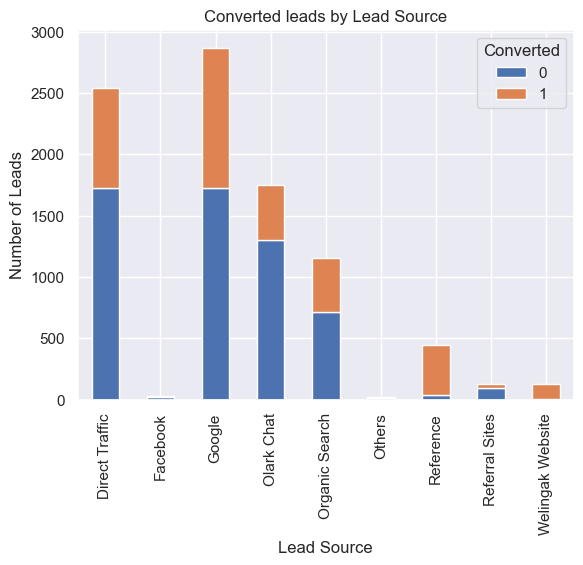

In [25]:
contingency_table = pd.crosstab(index=leads['Lead Source'], columns=leads['Converted'])
contingency_table.plot(kind='bar', stacked=True)
plt.title('Converted leads by Lead Source')
plt.xlabel('Lead Source')
plt.ylabel('Number of Leads')
plt.show()

The top-performing lead sources for conversions are "Google," "Direct Traffic," and "Olark Chat." "Reference" and "Welingak Website" also show promising conversion rates. However, "Facebook" and "Others" have relatively lower conversion rates compared to their leads count, suggesting areas for improvement.

In [26]:
# Check "Last Activity" column
leads['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [27]:
# Create a new category 'Others' for Last Activity with less than 25 values
leads.loc[leads['Last Activity'].isin(['Had a Phone Conversation'
                                       'View in browser link Clicked', 
                                       'Approached upfront',
                                       'Email Received',
                                       'Email Marked Spam',
                                       'Visited Booth in Tradeshow',
                                       'Resubscribed to emails'
                                      ]), 'Last Activity'] = 'Others'

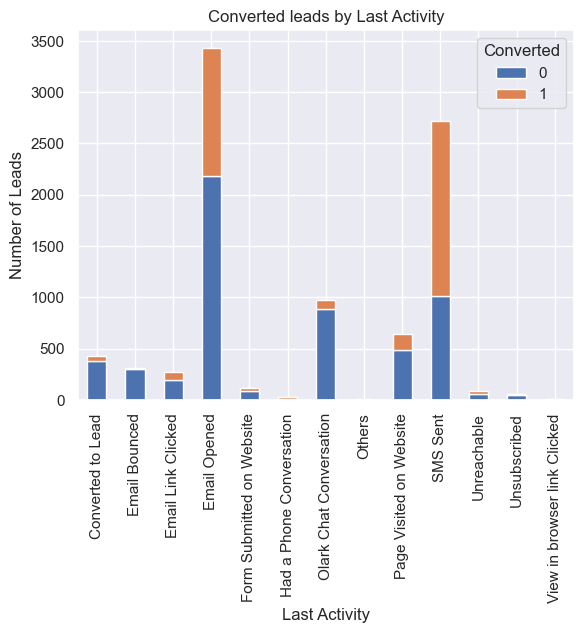

In [28]:
contingency_table = pd.crosstab(index=leads['Last Activity'], columns=leads['Converted'])
contingency_table.plot(kind='bar', stacked=True)
plt.title('Converted leads by Last Activity')
plt.xlabel('Last Activity')
plt.ylabel('Number of Leads')
plt.show()

Leads who have the last activity of "Email Opened" and "SMS Sent" show a higher conversion rate, while leads who have the last activity of "Email Bounced," "Form Submitted on Website," and "Unsubscribed" have a relatively lower conversion rate.

#### Univariate Analysis - Numeric Variables

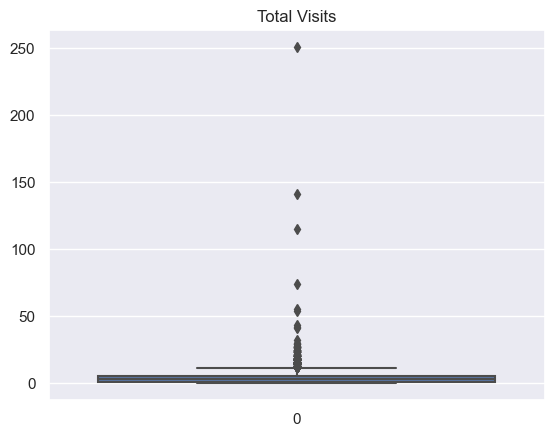

In [29]:
# Convert "TotalVisits" column to integer format
leads['TotalVisits'] = leads['TotalVisits'].astype(int)

# Visualizing
sns.boxplot(data=leads.TotalVisits).set(title = 'Total Visits')
plt.show()

There are outliers in TotalVisits column so we have to handle it using Interquartile Range (IQR) - which is robust to outliers

In [30]:
# Calculate the IQR
Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers using the lower and upper bounds
leads['TotalVisits'] = leads['TotalVisits'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

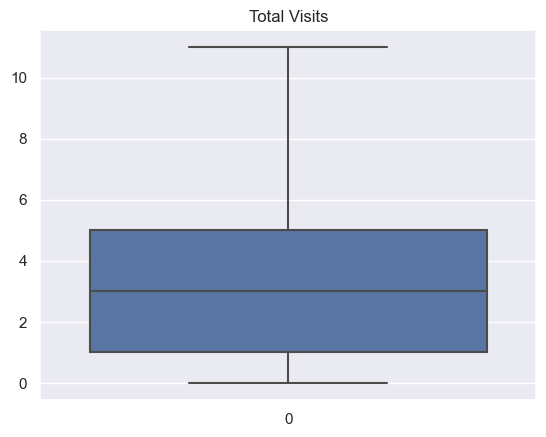

In [31]:
# Visualizing again
sns.boxplot(data=leads.TotalVisits).set(title = 'Total Visits')
plt.show()

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

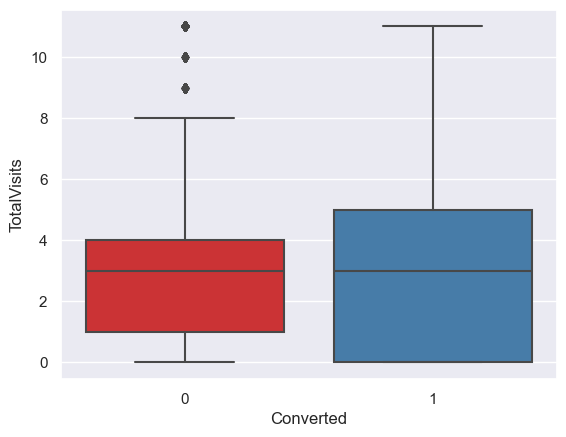

In [32]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads,palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

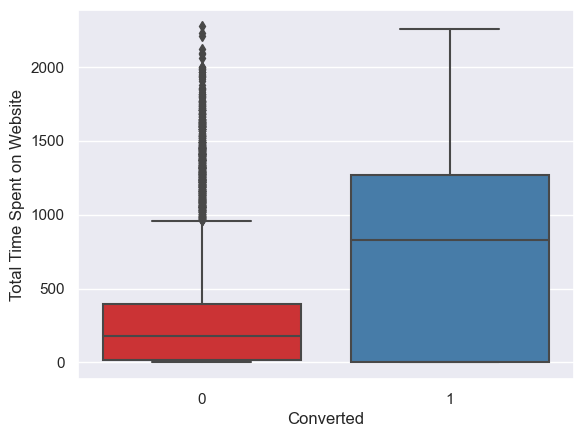

In [33]:
# Check column "Total Time Spent on Website"
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads,palette='Set1')

Leads who spend a longer time on the website have a higher likelihood of conversion.

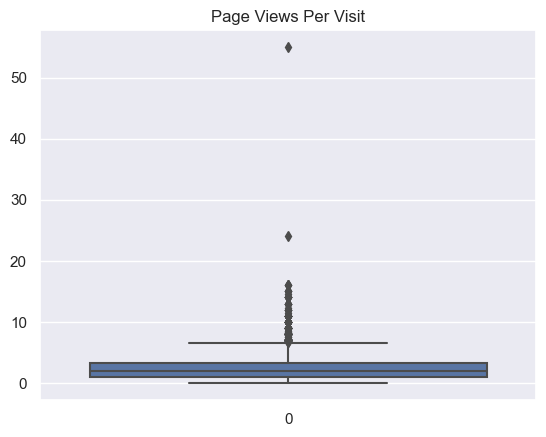

In [34]:
# Check "Page Views Per Visit" column
# Visualizing
sns.boxplot(data=leads['Page Views Per Visit']).set(title = 'Page Views Per Visit')
plt.show()

In [35]:
# Calculate the IQR
Q1 = leads['Page Views Per Visit'].quantile(0.25)
Q3 = leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers using the lower and upper bounds
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

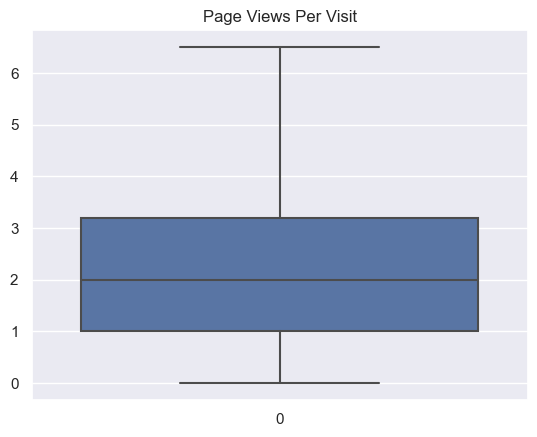

In [36]:
# Visualizing again
sns.boxplot(data=leads['Page Views Per Visit']).set(title = 'Page Views Per Visit')
plt.show()

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

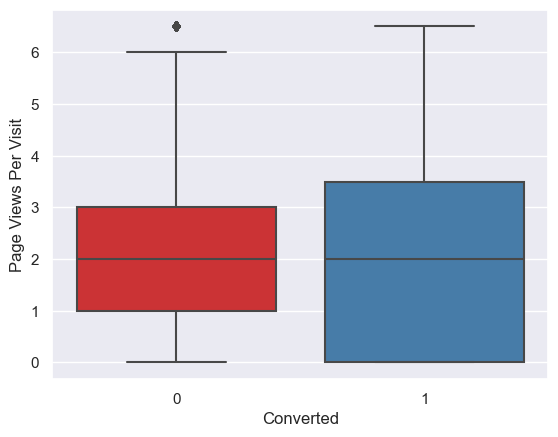

In [37]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads,palette='Set1')

In [38]:
# Check binary columns

# List of binary columns with Yes-No values
binary_columns = ['Do Not Email', 'Do Not Call',
                  'Search', 'Magazine',
                  'Newspaper Article',
                  'X Education Forums', 'Newspaper',
                  'Digital Advertisement', 'Through Recommendations',
                  'Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content', 'Get updates on DM Content',
                  'I agree to pay the amount through cheque',
                  'A free copy of Mastering The Interview']

# Iterate through binary columns and map to 0-1 values
for col in binary_columns:
    # Map 'Yes' to 1 and 'No' to 0
    leads[col] = leads[col].map({'Yes': 1, 'No': 0})


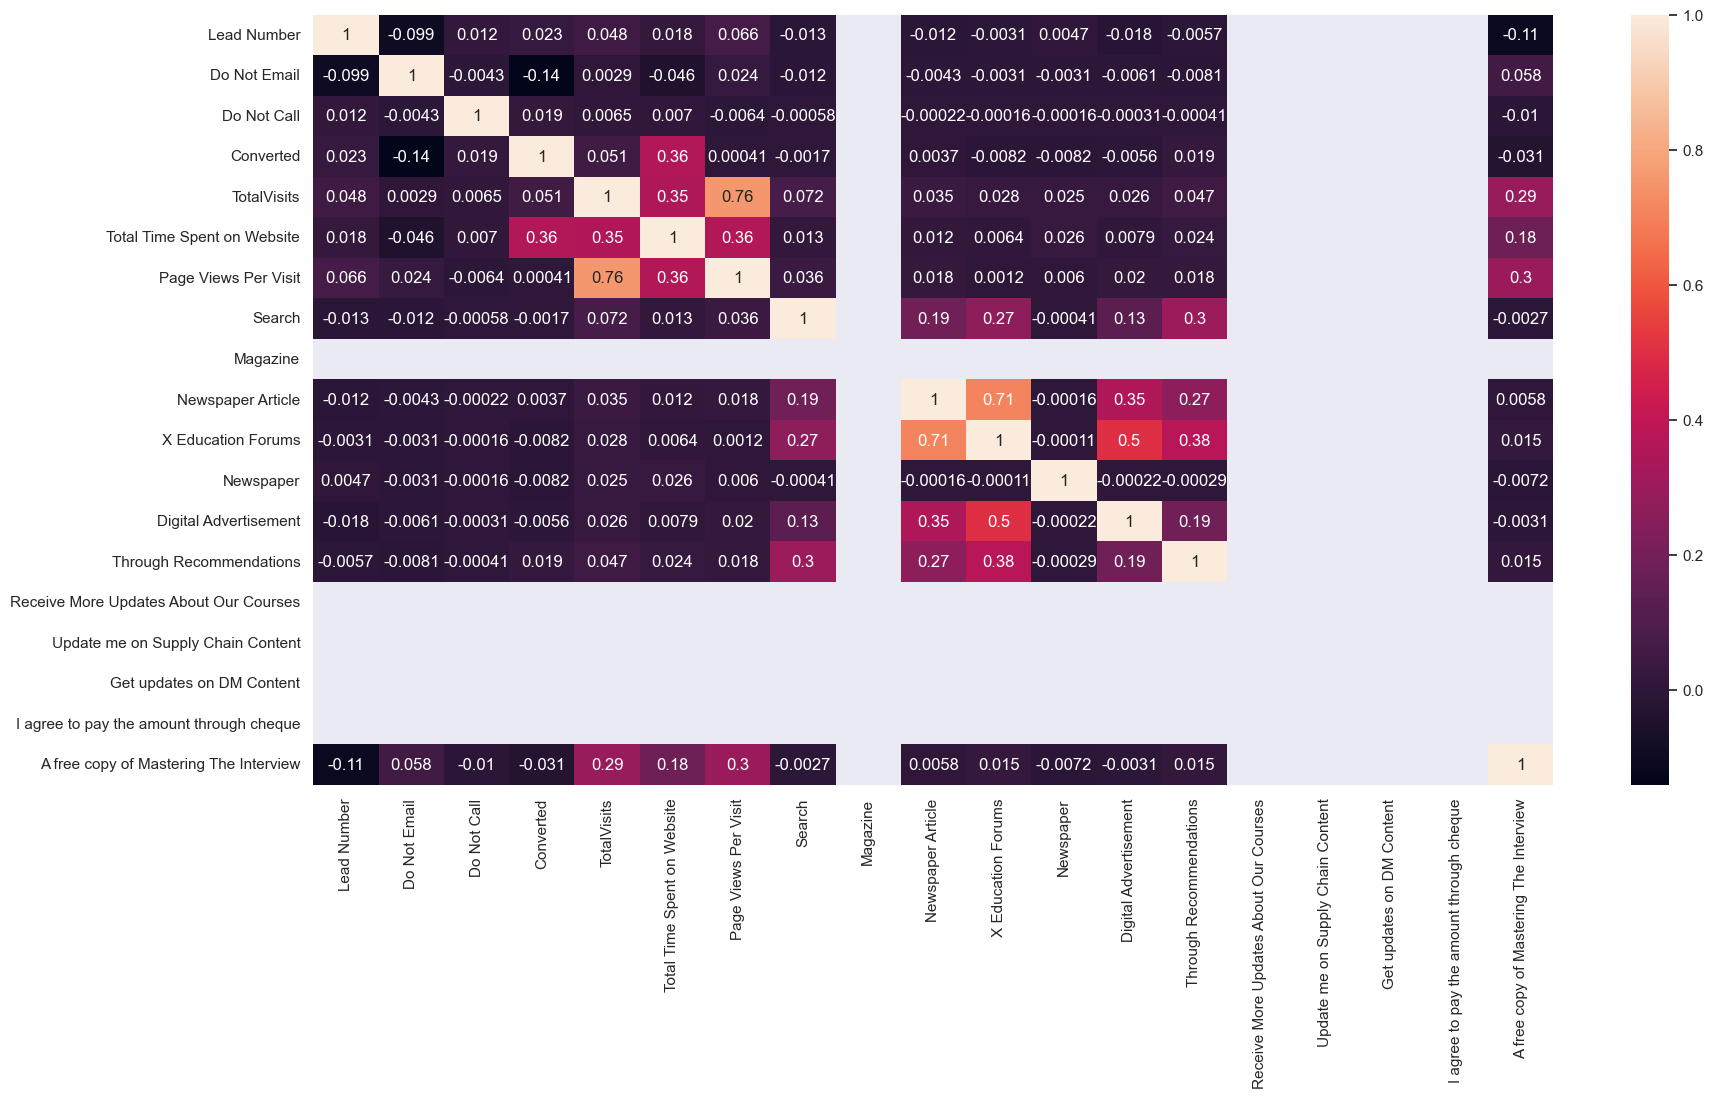

In [39]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [40]:
# Drop unnecessary column
leads = leads.drop(['Lead Number','Search','Magazine','Newspaper Article','X Education Forums',
                    'Newspaper','Digital Advertisement','Through Recommendations',
                    'Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content','Get updates on DM Content',
                    'I agree to pay the amount through cheque',
                    'A free copy of Mastering The Interview'],1)

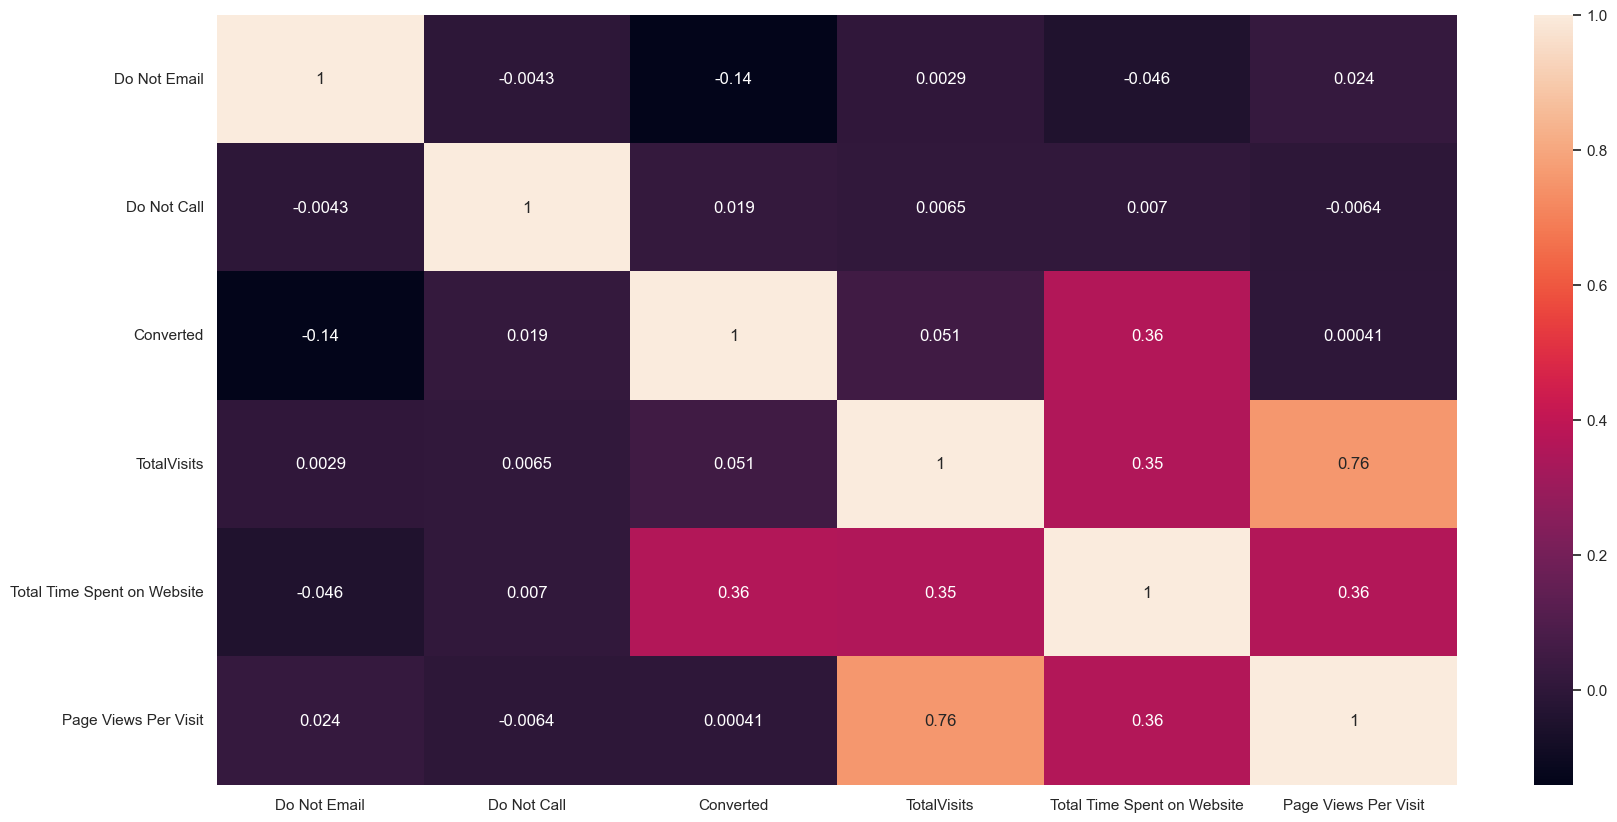

In [41]:
# Let's see the correlation matrix again
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

### Step 3: Data Preprocessing

In [42]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unemployed,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Student,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Unemployed,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Modified


In [43]:
leads.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [44]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 
                               'Last Activity', 'Country',
                               'What is your current occupation',
                               'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [45]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin', 'Lead Source', 
                               'Last Activity', 'Country',
                               'What is your current occupation',
                               'Last Notable Activity'], 1)

In [46]:
# Splitting the Data into Training and Testing Sets
# Putting feature variable to X
X = leads.drop(['Prospect ID','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [47]:
# Putting target variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [48]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [49]:
# Feature Scaling
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.431325,-0.160255,-0.161929,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.431325,-0.540048,-0.161929,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.124566,-0.888650,-1.247280,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.431325,1.643304,-0.161929,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.608537,2.017593,0.109409,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Step 4: Model Building

In [50]:
# First training Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6268
Model Family:                Binomial   Df Model:                           82
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2562.5
Date:                Mon, 07 Aug 2023   Deviance:                       5125.0
Time:                        16:10:26   Pearson chi2:                 6.38e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4091
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   21.5346   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Do Not Email                                            -1.5782      0.226     -6.998      0.000      -2.020      -1.136
Do Not Call                                             24.0782   8.78e+04      0.000      1.000   -1.72e+05    1.72e+05
TotalVisits                                              0.3315      0.055      6.007      0.000       0.223       0.440
Total Time Spent on Website                              1.1298      0.041     27.325      0.000       1.049       1.211
Page Views Per Visit                                    -0.2750      0.062     -4.436      0.000      -0.396      -0.153
Lead Origin_Landing Page Submission                     -0.1846      0.103     -1.800      0.072      -0.386       0.016
Lead Origin_Lead Add Form                                1.4810      1.044      1.419      0.156      -0.565       3.527
Lead Origin_Lead Import                                 25.3353   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Facebook                                   -23.7728   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                       0.3187      0.098      3.268      0.001       0.128       0.510
Lead Source_Olark Chat                                   1.2674      0.160      7.901      0.000       0.953       1.582
Lead Source_Organic Search                               0.0278      0.132      0.210      0.834      -0.232       0.287
Lead Source_Others                                       0.9685      0.676      1.433      0.152      -0.356       2.293
Lead Source_Reference                                    2.4568      1.068      2.301      0.021       0.364       4.550
Lead Source_Referral Sites                              -0.1986      0.351     -0.565      0.572      -0.887       0.490
Lead Source_Welingak Website                             4.4948      1.271      3.535      0.000       2.003       6.987
Last Activity_Email Bounced                             -0.2453      0.677     -0.363      0.717      -1.572       1.081
Last Activity_Email Link Clicked                         0.7665      0.427      1.796      0.072      -0.070       1.603
Last Activity_Email Opened                               0.9818      0.254      3.864      0.000       0.484       1.480
Last Activity_Form Submitted on Website                  0.5953      0.400      1.489      0.137      -0.188       1.379
Last Activity_Had a Phone Conversation                   2.7396      1.172      2.338      0.019       0.443       5.036
Last Activity_Olark Chat Conversation                   -0

In [51]:
# Feature Selection Using RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 3),
 ('TotalVisits', False, 30),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 31),
 ('Lead Origin_Landing Page Submission', False, 38),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 16),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 62),
 ('Lead Source_Others', False, 24),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 40),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 13),
 ('Last Activity_Email Link Clicked', False, 34),
 ('Last Activity_Email Opened', False, 11),
 ('Last Activity_Form Submitted on Website', False, 36),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', Fa

In [53]:
# Get the selected features
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed', 'Country_Italy',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

#### Model 1

In [54]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2631.9
Date:                Mon, 07 Aug 2023   Deviance:                       5263.7
Time:                        16:10:33   Pearson chi2:                 6.45e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3960
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1465      0.611      0.240      0.810      -1.050       1.343
Do Not Email                                            -1.7104      0.189     -9.063      0.000      -2.080      -1.340
Total Time Spent on Website                              1.1364      0.041     28.036      0.000       1.057       1.216
Lead Origin_Lead Add Form                                2.2521      0.956      2.356      0.018       0.379       4.125
Lead Origin_Lead Import                                  1.4968      0.459      3.262      0.001       0.597       2.396
Lead Source_Olark Chat                                   1.2531      0.104     12.010      0.000       1.049       1.458
Lead Source_Reference                                    1.7277      0.980      1.763      0.078      -0.193       3.648
Lead Source_Welingak Website                             3.6872      1.197      3.080      0.002       1.341       6.034
Last Activity_Had a Phone Conversation                   2.3403      1.164      2.011      0.044       0.059       4.622
Last Activity_Olark Chat Conversation                   -0.9653      0.167     -5.776      0.000      -1.293      -0.638
Last Activity_Others                                     3.3725      1.133      2.977      0.003       1.152       5.593
Last Activity_SMS Sent                                   1.3142      0.075     17.520      0.000       1.167       1.461
Last Activity_Unsubscribed                               1.4532      0.479      3.035      0.002       0.515       2.391
Country_Italy                                          -23.9975   2.72e+04     -0.001      0.999   -5.33e+04    5.32e+04
What is your current occupation_Housewife               21.4521   1.57e+04      0.001      0.999   -3.08e+04    3.08e+04
What is your current occupation_Student                 -0.9620      0.649     -1.483      0.138      -2.234       0.310
What is your current occupation_Unemployed              -1.3866      0.610     -2.271      0.023      -2.583      -0.190
What is your current occupation_Working Professional     1.3924      0.636      2.188      0.029       0.145       2.640
Last Notable Activity_Had a Phone Conversation           1.1246      1.598      0.704      0.482      -2.007       4.256
Last Notable Activity_Modified                          -0.8750      0.081    -10.842      0.000      -1.033      -0.717
Last Notable Activity_Unreachable                        1.6421      0.476      3.452      0.001       0.710       2.574
========================================================================================================================
"""

In [55]:
# Drop "Country_Italy" and "What is your current occupation_Housewife" as it has high p-value
col1 = col.drop(['What is your current occupation_Housewife', 'Country_Italy'])

#### Model 2

In [56]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.5
Date:                Mon, 07 Aug 2023   Deviance:                       5273.0
Time:                        16:10:33   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3952
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5509      0.560      0.984      0.325      -0.546       1.648
Do Not Email                                            -1.7107      0.189     -9.060      0.000      -2.081      -1.341
Total Time Spent on Website                              1.1330      0.040     28.011      0.000       1.054       1.212
Lead Origin_Lead Add Form                                2.2504      0.955      2.356      0.018       0.378       4.123
Lead Origin_Lead Import                                  1.4933      0.459      3.254      0.001       0.594       2.393
Lead Source_Olark Chat                                   1.2502      0.104     11.992      0.000       1.046       1.455
Lead Source_Reference                                    1.7309      0.979      1.767      0.077      -0.189       3.651
Lead Source_Welingak Website                             3.6868      1.197      3.080      0.002       1.341       6.033
Last Activity_Had a Phone Conversation                   2.3406      1.163      2.012      0.044       0.061       4.621
Last Activity_Olark Chat Conversation                   -0.9673      0.167     -5.787      0.000      -1.295      -0.640
Last Activity_Others                                     3.3718      1.132      2.977      0.003       1.152       5.591
Last Activity_SMS Sent                                   1.3090      0.075     17.466      0.000       1.162       1.456
Last Activity_Unsubscribed                               1.4534      0.479      3.037      0.002       0.516       2.391
What is your current occupation_Student                 -1.3644      0.601     -2.269      0.023      -2.543      -0.186
What is your current occupation_Unemployed              -1.7892      0.560     -3.195      0.001      -2.887      -0.692
What is your current occupation_Working Professional     0.9899      0.588      1.683      0.092      -0.163       2.142
Last Notable Activity_Had a Phone Conversation           1.1213      1.597      0.702      0.483      -2.009       4.252
Last Notable Activity_Modified                          -0.8760      0.081    -10.862      0.000      -1.034      -0.718
Last Notable Activity_Unreachable                        1.6386      0.476      3.444      0.001       0.706       2.571
========================================================================================================================
"""

In [57]:
# Drop "Last Notable Activity_Had a Phone Conversation" as it has high p-value
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

#### Model 3

In [58]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.7
Date:                Mon, 07 Aug 2023   Deviance:                       5273.5
Time:                        16:10:33   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3951
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5524      0.560      0.987      0.324      -0.544       1.649
Do Not Email                                            -1.7129      0.189     -9.074      0.000      -2.083      -1.343
Total Time Spent on Website                              1.1328      0.040     28.005      0.000       1.053       1.212
Lead Origin_Lead Add Form                                2.2500      0.955      2.355      0.019       0.377       4.123
Lead Origin_Lead Import                                  1.4928      0.459      3.253      0.001       0.593       2.392
Lead Source_Olark Chat                                   1.2496      0.104     11.986      0.000       1.045       1.454
Lead Source_Reference                                    1.7312      0.980      1.767      0.077      -0.189       3.651
Lead Source_Welingak Website                             3.6875      1.197      3.080      0.002       1.341       6.034
Last Activity_Had a Phone Conversation                   2.9936      0.754      3.969      0.000       1.515       4.472
Last Activity_Olark Chat Conversation                   -0.9660      0.167     -5.779      0.000      -1.294      -0.638
Last Activity_Others                                     3.3735      1.132      2.979      0.003       1.154       5.593
Last Activity_SMS Sent                                   1.3089      0.075     17.464      0.000       1.162       1.456
Last Activity_Unsubscribed                               1.4552      0.479      3.041      0.002       0.517       2.393
What is your current occupation_Student                 -1.3652      0.601     -2.270      0.023      -2.544      -0.187
What is your current occupation_Unemployed              -1.7897      0.560     -3.196      0.001      -2.887      -0.692
What is your current occupation_Working Professional     0.9896      0.588      1.683      0.092      -0.163       2.142
Last Notable Activity_Modified                          -0.8789      0.081    -10.908      0.000      -1.037      -0.721
Last Notable Activity_Unreachable                        1.6377      0.476      3.442      0.001       0.705       2.570
========================================================================================================================
"""

In [59]:
# Drop "What is your current occupation_Working Professional" as it has high p-value
col1 = col1.drop('What is your current occupation_Working Professional')

In [60]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.40
5,Lead Source_Reference,47.98
6,Lead Source_Welingak Website,15.47
13,What is your current occupation_Unemployed,2.43
14,Last Notable Activity_Modified,1.81
4,Lead Source_Olark Chat,1.73
8,Last Activity_Olark Chat Conversation,1.56
10,Last Activity_SMS Sent,1.52
1,Total Time Spent on Website,1.28
0,Do Not Email,1.20


In [61]:
# Drop "Lead Source_Reference" as it has high p-value and high VIF
col1 = col1.drop('Lead Source_Reference')

#### Model 4

In [62]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.4
Date:                Mon, 07 Aug 2023   Deviance:                       5278.7
Time:                        16:10:33   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3946
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.4585      0.178      8.194      0.000       1.110       1.807
Do Not Email                                  -1.7106      0.189     -9.068      0.000      -2.080      -1.341
Total Time Spent on Website                    1.1315      0.040     27.974      0.000       1.052       1.211
Lead Origin_Lead Add Form                      3.9144      0.223     17.546      0.000       3.477       4.352
Lead Origin_Lead Import                        1.4955      0.458      3.265      0.001       0.598       2.393
Lead Source_Olark Chat                         1.2479      0.104     11.964      0.000       1.043       1.452
Lead Source_Welingak Website                   2.0212      0.753      2.685      0.007       0.546       3.497
Last Activity_Had a Phone Conversation         2.9946      0.754      3.971      0.000       1.517       4.473
Last Activity_Olark Chat Conversation         -0.9656      0.167     -5.773      0.000      -1.293      -0.638
Last Activity_Others                           3.3789      1.132      2.986      0.003       1.161       5.597
Last Activity_SMS Sent                         1.3121      0.075     17.526      0.000       1.165       1.459
Last Activity_Unsubscribed                     1.4580      0.478      3.053      0.002       0.522       2.394
What is your current occupation_Student       -2.2687      0.283     -8.010      0.000      -2.824      -1.714
What is your current occupation_Unemployed    -2.6963      0.179    -15.094      0.000      -3.046      -2.346
Last Notable Activity_Modified                -0.8803      0.081    -10.933      0.000      -1.038      -0.723
Last Notable Activity_Unreachable              1.6399      0.475      3.449      0.001       0.708       2.572
==============================================================================================================
"""

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,2.43
13,Last Notable Activity_Modified,1.81
4,Lead Source_Olark Chat,1.73
7,Last Activity_Olark Chat Conversation,1.56
9,Last Activity_SMS Sent,1.52
2,Lead Origin_Lead Add Form,1.46
5,Lead Source_Welingak Website,1.31
1,Total Time Spent on Website,1.28
0,Do Not Email,1.20
10,Last Activity_Unsubscribed,1.08


As the P-values of all variables are 0 and the VIF values are consistently low for each variable, we confidently select model 4 as our ultimate choice. Our final model comprises 15 variables.

In [64]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.19480041, 0.29666114, 0.36268897, 0.8736668 , 0.81411671,
       0.75243437, 0.09664907, 0.9027871 , 0.86567062, 0.78522233])

In [65]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.194800,3009
1,0,0.296661,1012
2,0,0.362689,9226
3,1,0.873667,4750
4,1,0.814117,7987


In [66]:
# Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.194800,3009,0
1,0,0.296661,1012,0
2,0,0.362689,9226,0
3,1,0.873667,4750,1
4,1,0.814117,7987,1


In [67]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3477  428]
 [ 733 1713]]


In [68]:
# Predicted     not_converted    converted
# Actual
# not_converted        3477      428
# converted            733       1713  

In [69]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8171941426547


#### Metrics beyond simply accuracy

In [70]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [71]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7003270645952575

In [72]:
# Let us calculate specificity
TN / float(TN+FP)

0.8903969270166453

In [73]:
# Calculate false postive rate - predicting converted when lead does not have converted
print(FP/ float(TN+FP))

0.10960307298335467


In [74]:
# positive predictive value 
print (TP / float(TP+FP))

0.8000934142923868


In [75]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8258907363420428


Our specificity achieved a solid ~89%, but our sensitivity was around 70%, largely due to the 0.5 cut-off point we used. To improve sensitivity, we'll fine-tune this cut-off using the ROC curve.

#### Plotting the ROC Curve

In [76]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [77]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

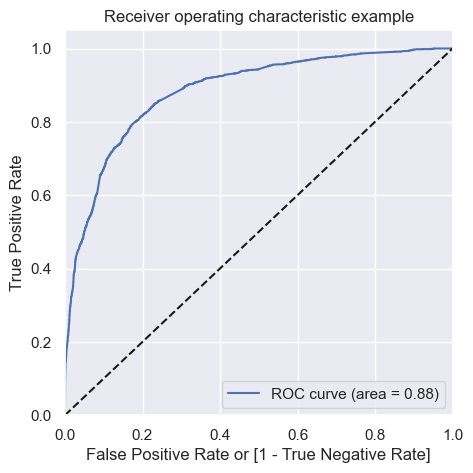

In [78]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The higher area under the ROC curve is 0.88 so this is a good model.

#### Finding Optimal Cutoff Point

In [79]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.194800,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.296661,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.362689,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.873667,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.814117,7987,1,1,1,1,1,1,1,1,1,1,0


In [80]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.591403  0.971382  0.353393
0.2   0.2  0.748544  0.912919  0.645583
0.3   0.3  0.799559  0.846688  0.770038
0.4   0.4  0.813888  0.763696  0.845327
0.5   0.5  0.817194  0.700327  0.890397
0.6   0.6  0.795150  0.592805  0.921895
0.7   0.7  0.779405  0.511856  0.946991
0.8   0.8  0.761927  0.425184  0.972855
0.9   0.9  0.711699  0.269419  0.988732


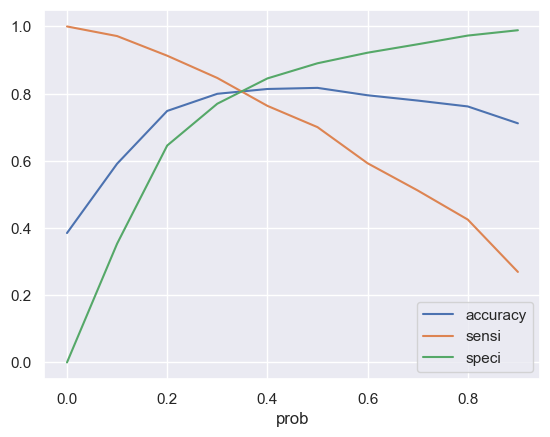

In [81]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [82]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.194800,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.296661,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.362689,9226,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.873667,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.814117,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [83]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8083766336010078

In [84]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3158,  747],
       [ 470, 1976]], dtype=int64)

In [85]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [86]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8078495502861816

In [87]:
# Let us calculate specificity
TN / float(TN+FP)

0.8087067861715749

### Step 5: Model Evaluation

#### Making predictions on the test set

In [88]:
# Scaling test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,0.279059,-0.591008,0.961078,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1490,0,0,0.627468,1.894051,1.512253,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0,0,-0.417757,-0.743117,-0.141271,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4216,0,0,-1.114574,-0.878732,-1.243621,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,0,0,1.672693,-0.578179,2.339015,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3271,0,-0.591008,0,0,0,0,0,0,0,0,0,0,1,0,0
1490,0,1.894051,0,0,0,0,0,0,0,0,0,0,0,0,0
7936,0,-0.743117,0,0,0,0,0,0,0,0,0,0,1,0,0
4216,0,-0.878732,1,0,0,0,0,0,0,0,0,1,0,1,0
3830,0,-0.578179,0,0,0,0,0,0,0,0,0,0,1,0,0


In [90]:
X_test_sm = sm.add_constant(X_test)

In [91]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.129371
1490    0.973447
7936    0.111189
4216    0.773742
3830    0.131015
1800    0.650616
6507    0.342422
4821    0.306225
4223    0.952320
4714    0.365287
dtype: float64

In [92]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.129371
1490,0.973447
7936,0.111189
4216,0.773742
3830,0.131015


In [93]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [94]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [95]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [96]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [97]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.129371
1,1,1490,0.973447
2,0,7936,0.111189
3,1,4216,0.773742
4,0,3830,0.131015


In [98]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [99]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [100]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.129371
1,1490,1,0.973447
2,7936,0,0.111189
3,4216,1,0.773742
4,3830,0,0.131015


In [101]:
# Based on sensitivity and specificity, the cutoff is 0.35
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [102]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.129371,0
1,1490,1,0.973447,1
2,7936,0,0.111189,0
3,4216,1,0.773742,1
4,3830,0,0.131015,0


In [103]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8020565552699229


In [104]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1399,  335],
       [ 204,  785]], dtype=int64)

In [105]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [106]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7937310414560161

In [107]:
# Let us calculate specificity
TN / float(TN+FP)

0.8068050749711649

<b> Train Data: </b>
- Accuracy : 80.8 %
- Sensitivity : 80.7 %
- Specificity : 80.8 %

<b> Test Data: </b>
- Accuracy : 80.2 %
- Sensitivity : 79.3 %
- Specificity : 80.6 %

The model demonstrates solid performance with accuracy around 80% for both train and test data. While sensitivity is slightly lower in the test set, the model maintains consistent specificity levels.

In [108]:
# Assign a lead score between 0 and 100 to each of the leads
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head(20)

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.129371,0,13
1,1490,1,0.973447,1,97
2,7936,0,0.111189,0,11
3,4216,1,0.773742,1,77
4,3830,0,0.131015,0,13
5,1800,1,0.650616,1,65
6,6507,0,0.342422,0,34
7,4821,0,0.306225,0,31
8,4223,1,0.952320,1,95
9,4714,0,0.365287,1,37


In [109]:
# Importance features by their coefficients
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                     3.914415
Last Activity_Others                          3.378900
Last Activity_Had a Phone Conversation        2.994631
Lead Source_Welingak Website                  2.021243
Last Notable Activity_Unreachable             1.639852
Lead Origin_Lead Import                       1.495523
const                                         1.458474
Last Activity_Unsubscribed                    1.458013
Last Activity_SMS Sent                        1.312078
Lead Source_Olark Chat                        1.247856
Total Time Spent on Website                   1.131548
Last Notable Activity_Modified               -0.880317
Last Activity_Olark Chat Conversation        -0.965569
Do Not Email                                 -1.710632
What is your current occupation_Student      -2.268683
What is your current occupation_Unemployed   -2.696253
dtype: float64